# Real projective plane $\mathbb{RP}^2$

*This worksheet demonstrates a few capabilities of <a href="http://sagemanifolds.obspm.fr/">SageManifolds</a> (version 0.9.1) in computations regarding the real projective plane.*

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v0.9.1/SM_projective_plane.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, via the command `sage -n jupyter`


First we set up the notebook to display mathematical objects using LaTeX formatting:

In [1]:
%display latex

We also define a viewer for 3D plots (use `'jmol'` for interactive 3D graphics):

In [2]:
viewer3D = 'tachyon' # must be 'jmol', 'tachyon' or None (default)

## Constructing the manifold
We start by declaring the real projective plane as a 2-dimensional differentiable manifold:

In [3]:
RP2 = Manifold(2, 'RP^2', r'\mathbb{RP}^2') ; RP2

2-dimensional differentiable manifold RP^2

<p>Then we provide $\mathbb{RP}^2$ with some atlas. A minimal atlas on $\mathbb{RP}^2$ must have at least three charts. Such an atlas is easy to infer from the common interpretation of $\mathbb{RP}^2$ as the set of lines of $\mathbb{R}^3$ passing through the origin $(x,y,z)=(0,0,0)$. Let $U_1$ be the subset of lines that are not contained in the plane $z=0$; this is an open set of $\mathbb{RP}^2$, so that we declare it as:</p>

In [4]:
U1 = RP2.open_subset('U_1') ; U1

Open subset U_1 of the 2-dimensional differentiable manifold RP^2

<p>Any line in $U_1$ is uniquely determined by its intersection with the plane $z=1$. The Cartesian coordinates $(x,y,1)$ of the intersection point lead to an obvious coordinate system $(x_1,y_1)$ on $U_1$ by setting $(x_1,y_1)=(x,y)$:</p>

In [5]:
X1.<x1,y1> = U1.chart() ; X1

Chart (U_1, (x1, y1))

<p>Note that since we have not specified any coordinate range in the arguments of <span style="font-family: courier new,courier;">chart()</span>, the range of $(x_1,y_1)$ is $\mathbb{R}^2$. </p>
<p>Similarly, let $U_2$ be the set of lines through the origin of $\mathbb{R}^3$ that are not contained in the plane $x=0$. Any line in $U_2$ is uniquely determined by its intersection $(1,y,z)$ with the plane $x=1$, leading to coordinates $(x_2,y_2)=(y,z)$ on $U_2$:</p>

In [6]:
U2 = RP2.open_subset('U_2')
X2.<x2,y2> = U2.chart() ; X2

Chart (U_2, (x2, y2))

<p>Finally, let $U_3$ be the set of lines through the origin of $\mathbb{R}^3$ that are not contained in the plane $y=0$. Any line in $U_3$ is uniquely determined by its intersection $(x,1,z)$ with the plane $y=1$, leading to coordinates $(x_3,y_3)=(z,x)$ on $U_3$:</p>

In [7]:
U3 = RP2.open_subset('U_3')
X3.<x3,y3> = U3.chart() ; X3

Chart (U_3, (x3, y3))

<p>We declare that the union of the three (overlapping) open domains $U_1$, $U_2$ and $U_3$ is $\mathbb{RP}^2$:</p>

In [8]:
RP2.declare_union(U1.union(U2), U3)
U1.union(U2).union(U3)

2-dimensional differentiable manifold RP^2

<p>At this stage, three open covers of $\mathbb{RP}^2$ have been constructed:</p>

In [9]:
RP2.open_covers()

[[2-dimensional differentiable manifold RP^2],
 [Open subset U_1_union_U_2 of the 2-dimensional differentiable manifold RP^2,
  Open subset U_3 of the 2-dimensional differentiable manifold RP^2],
 [Open subset U_1 of the 2-dimensional differentiable manifold RP^2,
  Open subset U_2 of the 2-dimensional differentiable manifold RP^2,
  Open subset U_3 of the 2-dimensional differentiable manifold RP^2]]

<p>Finally, to fully specify the manifold $\mathbb{RP}^2$, we give the transition maps between the various charts; the transition map between the charts X1=$(U_1,(x_1,y_1))$ and X2=$(U_2,(x_2,y_2))$ is defined on the set $U_{12} := U_1 \cap U_2$ of lines through the origin of $\mathbb{R}^3$ that are neither contained in the plane $x=0$ ($x_1=0$ in $U_1$) nor contained in the plane $z=0$ ($y_2=0$ in $U_2$):</p>

In [10]:
X1_to_X2 = X1.transition_map(X2, (y1/x1, 1/x1), intersection_name='U_{12}',
                             restrictions1= x1!=0, restrictions2= y2!=0)
X1_to_X2.display()

x2 = y1/x1
y2 = 1/x1

<p>The inverse of this transition map is easily computed by Sage:</p>

In [11]:
X2_to_X1 = X1_to_X2.inverse()
X2_to_X1.display()

x1 = 1/y2
y1 = x2/y2

<p>The transition map between the charts X1=$(U_1,(x_1,y_1))$ and X3=$(U_3,(x_3,y_3))$ is defined on the set $U_{13} := U_1 \cap U_3$ of lines through the origin of $\mathbb{R}^3$ that are neither contained in the plane $y=0$ ($y_1=0$ in $U_1$) nor contained in the plane $z=0$ ($x_3=0$ in $U_3$):</p>

In [12]:
X1_to_X3 = X1.transition_map(X3, (1/y1, x1/y1), intersection_name='U_{13}',
                             restrictions1= y1!=0, restrictions2= x3!=0)
X1_to_X3.display()

x3 = 1/y1
y3 = x1/y1

In [13]:
X3_to_X1 = X1_to_X3.inverse()
X3_to_X1.display()

x1 = y3/x3
y1 = 1/x3

<p>Finally, the transition map between the charts X2=$(U_2,(x_2,y_2))$ and X3=$(U_3,(x_3,y_3))$ is defined on the set $U_{23} := U_2 \cap U_3$ of lines through the origin of $\mathbb{R}^3$ that are neither contained in the plane $y=0$ ($x_2=0$ in $U_2$) nor contained in the plane $x=0$ ($y_3=0$ in $U_3$):</p>

In [14]:
X2_to_X3 = X2.transition_map(X3, (y2/x2, 1/x2), intersection_name='U_{23}',
                             restrictions1= x2!=0, restrictions2= y3!=0)
X2_to_X3.display()

x3 = y2/x2
y3 = 1/x2

In [15]:
X3_to_X2 = X2_to_X3.inverse()
X3_to_X2.display()

x2 = 1/y3
y2 = x3/y3

<p>At this stage, the manifold $\mathbb{RP}^2$ is fully constructed. It has been provided with the following atlas:</p>

In [16]:
RP2.atlas()

[Chart (U_1, (x1, y1)),
 Chart (U_2, (x2, y2)),
 Chart (U_3, (x3, y3)),
 Chart (U_{12}, (x1, y1)),
 Chart (U_{12}, (x2, y2)),
 Chart (U_{13}, (x1, y1)),
 Chart (U_{13}, (x3, y3)),
 Chart (U_{23}, (x2, y2)),
 Chart (U_{23}, (x3, y3))]

<p>Note that, in addition to the three chart we have defined, the atlas comprises subcharts on the intersection domains $U_{12}$, $U_{13}$ and $U_{23}$. These charts can be obtained by the method <span style="font-family: courier new,courier;">restrict()</span>:</p>

In [17]:
U12 = U1.intersection(U2)
U13 = U1.intersection(U3)
U23 = U2.intersection(U3)
X1.restrict(U12)

Chart (U_{12}, (x1, y1))

In [18]:
X1.restrict(U12) is RP2.atlas()[3]

True

<h2>Non-orientability of $\mathbb{RP}^2$</h2>
<p>It is well known that $\mathbb{RP}^2$ is not an orientable manifold. To illustrate this, let us make an attempt to construct a global non-vanishing 2-form $\epsilon$ on $\mathbb{RP}^2$. If we succeed, this would provide a volume form and $\mathbb{RP}^2$ would be orientable. We start by declaring $\epsilon$ as a 2-form on $\mathbb{RP}^2$:</p>

In [19]:
eps = RP2.diff_form(2, name='eps', latex_name=r'\epsilon')
print(eps)

2-form eps on the 2-dimensional differentiable manifold RP^2


<p>We set the value of $\epsilon$ on domain $U_1$ to be $\mathrm{d}x_1 \wedge \mathrm{d}y_1$ by demanding that the component $\epsilon_{01}$ of $\epsilon$ with respect to coordinates $(x_1,y_1)$  is one, as follows:</p>

In [20]:
e1 = X1.frame() ; e1

Coordinate frame (U_1, (d/dx1,d/dy1))

In [21]:
eps[e1,0,1] = 1
eps.display(e1)

eps = dx1/\dy1

<p>If we ask for the expression of $\epsilon$ in terms of the coframe $(\mathrm{d}x_2, \mathrm{d}y_2)$ associated with the chart X2 on $U_{12} = U_1\cap U_2$, we get</p>

In [22]:
eps.display(X2.frame().restrict(U12), chart=X2.restrict(U12))

eps = y2^(-3) dx2/\dy2

<p>Now, the complement of $U_{12}$ in $U_2$ is defined by $y_2=0$. The above expression shows that it is not possible to extend smoothly $\epsilon$ to the whole domain $U_2$. We conclude that starting from $\mathrm{d}x_1\wedge\mathrm{d}y_1$ on $U_1$, it is not possible to get a regular non-vanishing 2-form on $\mathbb{RP}^2$. This of course follows from the fact that $\mathbb{RP}^2$ is not orientable.</p>

<h2>Steiner map (Roman surface)</h2>
<p>Let us first define $\mathbb{R}^3$ as a 3-dimensional manifold, with a single-chart atlas (Cartesian coordinates Y):</p>

In [23]:
R3 = Manifold(3, 'R^3', r'\mathbb{R}^3')
Y.<x,y,z> = R3.chart()

<p>The Steiner map is a map $\mathbb{RP}^2 \rightarrow \mathbb{R}^3$ defined as follows:</p>

In [24]:
Phi = RP2.diff_map(R3, {(X1,Y): [y1/(1+x1^2+y1^2), x1/(1+x1^2+y1^2), x1*y1/(1+x1^2+y1^2)],
                        (X2,Y): [x2*y2/(1+x2^2+y2^2), y2/(1+x2^2+y2^2), x2/(1+x2^2+y2^2)],
                        (X3,Y): [x3/(1+x3^2+y3^2), x3*y3/(1+x3^2+y3^2), y3/(1+x3^2+y3^2)]},
                   name='Phi', latex_name=r'\Phi')
Phi.display()

Phi: RP^2 --> R^3
on U_1: (x1, y1) |--> (x, y, z) = (y1/(x1^2 + y1^2 + 1), x1/(x1^2 + y1^2 + 1), x1*y1/(x1^2 + y1^2 + 1))
on U_2: (x2, y2) |--> (x, y, z) = (x2*y2/(x2^2 + y2^2 + 1), y2/(x2^2 + y2^2 + 1), x2/(x2^2 + y2^2 + 1))
on U_3: (x3, y3) |--> (x, y, z) = (x3/(x3^2 + y3^2 + 1), x3*y3/(x3^2 + y3^2 + 1), y3/(x3^2 + y3^2 + 1))

<p>$\Phi$ is a topological immersion of $\mathbb{RP}^2$ into $\mathbb{R}^3$, but it is not a smooth immersion (contrary to the Apéry map below): its differential is not injective at $(x_1,y_1)=(0,1)$ and $(x_1,y_1)=(1,0)$. The image of $\Phi$ is a self-intersecting surface of $\mathbb{R}^3$, called the <strong>Roman surface</strong>:</p>

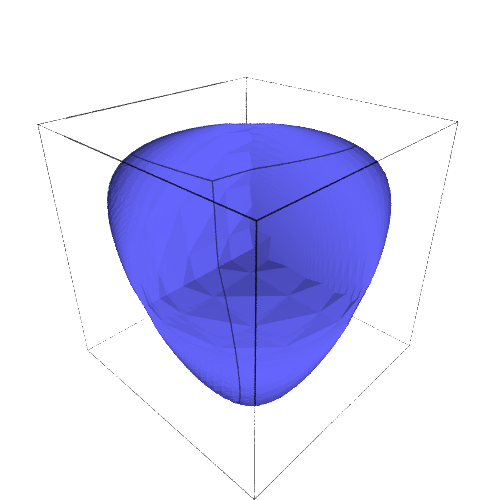

In [25]:
g1 = parametric_plot3d(Phi.expr(X1,Y), (x1,-10,10), (y1,-10,10), plot_points=[100,100])
g2 = parametric_plot3d(Phi.expr(X2,Y), (x2,-10,10), (y2,-10,10), plot_points=[100,100])
g3 = parametric_plot3d(Phi.expr(X3,Y), (x3,-10,10), (y3,-10,10), plot_points=[100,100])
show(g1+g2+g3, viewer=viewer3D)

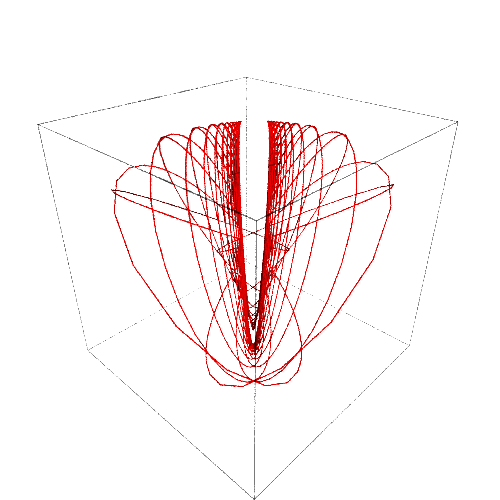

In [26]:
gX1 = X1.plot(Y, mapping=Phi, max_range=16, nb_values=24, plot_points=100)
gX2 = X2.plot(Y, mapping=Phi, max_range=16, nb_values=24, plot_points=100, color='green')
gX3 = X3.plot(Y, mapping=Phi, max_range=16, nb_values=24, plot_points=100, color='blue')
show(gX1, viewer=viewer3D)

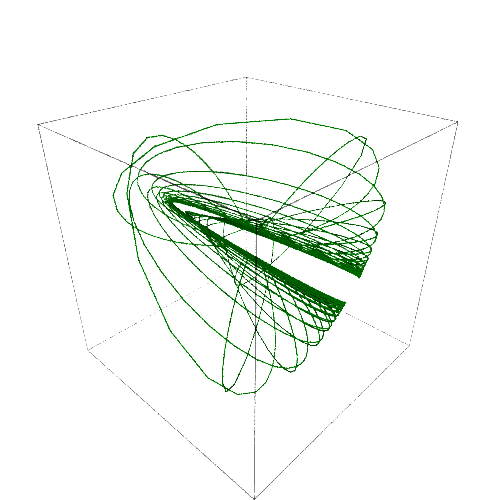

In [27]:
show(gX2, viewer=viewer3D)

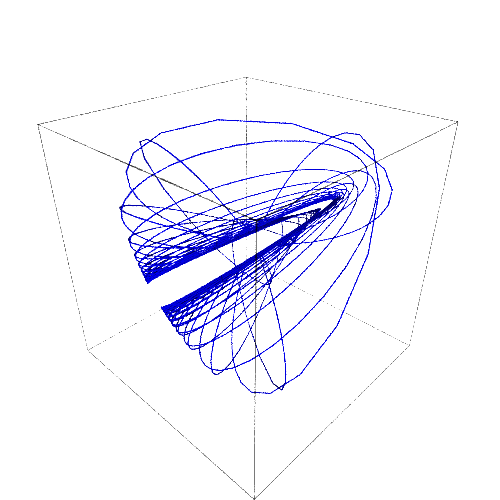

In [28]:
show(gX3, viewer=viewer3D)

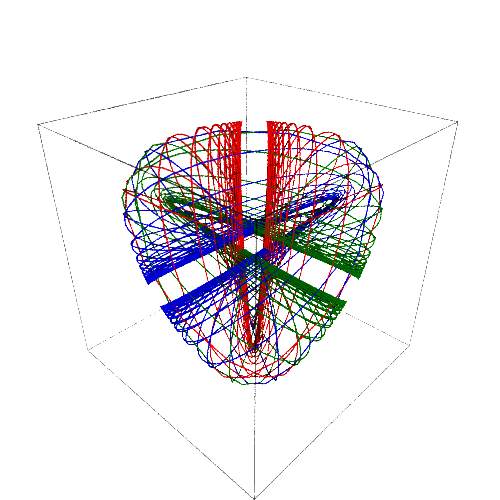

In [29]:
show(gX1+gX2+gX3, viewer=viewer3D)

<h2>Apéry map (Boy surface)</h2>
<p>The Apéry map [<a href="http://dx.doi.org/10.1016/0001-8708(86)90080-0">Apéry, Adv. Math. <strong>61</strong>, 185 (1986)</a>] is a smooth immersion $\Psi: \mathbb{RP}^2 \rightarrow \mathbb{R}^3$. In terms of the charts X1, X2, X3 introduced above, it is defined as follows:</p>

In [30]:
fx = ((2*x^2-y^2-z^2)*(x^2+y^2+z^2)+2*y*z*(y^2-z^2)+z*x*(x^2-z^2)+x*y*(y^2-z^2))/2 ; fx

1/2*(y^2 - z^2)*x*y + 1/2*(x^2 - z^2)*x*z + (y^2 - z^2)*y*z + 1/2*(2*x^2 - y^2 - z^2)*(x^2 + y^2 + z^2)

In [31]:
fy = sqrt(3)/2*((y^2-z^2)*(x^2+y^2+z^2)+z*x*(z^2-x^2)+x*y*(y^2-x^2)) ; fy

-1/2*sqrt(3)*((x^2 - y^2)*x*y + (x^2 - z^2)*x*z - (x^2 + y^2 + z^2)*(y^2 - z^2))

In [32]:
fz = (x+y+z)*((x+y+z)^3/4+(y-x)*(z-y)*(x-z)) ; fz

1/4*((x + y + z)^3 + 4*(x - y)*(x - z)*(y - z))*(x + y + z)

In [33]:
a = sqrt(1+x1^2+y1^2)
fx1 = fx.subs(x=x1/a, y=y1/a, z=1/a).simplify_full()
fy1 = fy.subs(x=x1/a, y=y1/a, z=1/a).simplify_full()
fz1 = fz.subs(x=x1/a, y=y1/a, z=1/a).simplify_full()

In [34]:
a = sqrt(1+x2^2+y2^2)
fx2 = fx.subs(x=1/a, y=x2/a, z=y2/a).simplify_full()
fy2 = fy.subs(x=1/a, y=x2/a, z=y2/a).simplify_full()
fz2 = fz.subs(x=1/a, y=x2/a, z=y2/a).simplify_full()

In [35]:
a = sqrt(1+x3^2+y3^2)
fx3 = fx.subs(x=y3/a, y=1/a, z=x3/a).simplify_full()
fy3 = fy.subs(x=y3/a, y=1/a, z=x3/a).simplify_full()
fz3 = fz.subs(x=y3/a, y=1/a, z=x3/a).simplify_full()

In [36]:
Psi = RP2.diff_map(R3, {(X1,Y): [fx1, fy1, fz1], (X2,Y): [fx2, fy2, fz2],
                        (X3,Y): [fx3, fy3, fz3]}, name='Psi', latex_name=r'\Psi')
Psi.display()

Psi: RP^2 --> R^3
on U_1: (x1, y1) |--> (x, y, z) = (1/2*(2*x1^4 + (x1 + 2)*y1^3 - y1^4 + x1^3 + (x1^2 - 2)*y1^2 + x1^2 - (x1 + 2)*y1 - x1 - 1)/(x1^4 + y1^4 + 2*(x1^2 + 1)*y1^2 + 2*x1^2 + 1), -1/2*(sqrt(3)*x1^3*y1 - sqrt(3)*x1^2*y1^2 - sqrt(3)*x1*y1^3 - sqrt(3)*y1^4 + sqrt(3)*x1^3 + sqrt(3)*x1^2 - sqrt(3)*x1 + sqrt(3))/(x1^4 + y1^4 + 2*(x1^2 + 1)*y1^2 + 2*x1^2 + 1), 1/4*(x1^4 + y1^4 + 6*(x1^2 + 2*x1 + 1)*y1^2 + 8*y1^3 + 6*x1^2 + 4*(2*x1^3 + 3*x1^2 + 3*x1)*y1 + 8*x1 + 1)/(x1^4 + y1^4 + 2*(x1^2 + 1)*y1^2 + 2*x1^2 + 1))
on U_2: (x2, y2) |--> (x, y, z) = (-1/2*(x2^4 + (2*x2 + 1)*y2^3 + y2^4 - x2^3 + (2*x2^2 + x2 - 1)*y2^2 - x2^2 - (2*x2^3 + 1)*y2 - 2)/(x2^4 + y2^4 + 2*(x2^2 + 1)*y2^2 + 2*x2^2 + 1), 1/2*(sqrt(3)*x2^4 - sqrt(3)*y2^4 + sqrt(3)*x2^3 + sqrt(3)*y2^3 + sqrt(3)*x2^2 - sqrt(3)*y2^2 - sqrt(3)*x2 - sqrt(3)*y2)/(x2^4 + y2^4 + 2*(x2^2 + 1)*y2^2 + 2*x2^2 + 1), 1/4*(x2^4 + y2^4 + 6*(x2^2 + 2*x2 + 1)*y2^2 + 8*y2^3 + 6*x2^2 + 4*(2*x2^3 + 3*x2^2 + 3*x2)*y2 + 8*x2 + 1)/(x2^4 + y2^4 + 2*(x2^2 + 1)*y2^2 + 2*x2^2 + 1))
on U_3: (x3, y3) |--> (x, y, z) = (-1/2*(x3^4 - x3*y3^3 - 2*y3^4 + 2*x3^3 - (x3^2 + 1)*y3^2 + 2*x3^2 + (x3^3 + x3^2 - 1)*y3 - 2*x3 + 1)/(x3^4 + y3^4 + 2*(x3^2 + 1)*y3^2 + 2*x3^2 + 1), -1/2*(sqrt(3)*x3^4 + (sqrt(3)*x3 + sqrt(3))*y3^3 + (sqrt(3)*x3^2 - sqrt(3))*y3^2 - (sqrt(3)*x3^3 + sqrt(3))*y3 - sqrt(3))/(x3^4 + y3^4 + 2*(x3^2 + 1)*y3^2 + 2*x3^2 + 1), 1/4*(x3^4 + y3^4 + 6*(x3^2 + 2*x3 + 1)*y3^2 + 8*y3^3 + 6*x3^2 + 4*(2*x3^3 + 3*x3^2 + 3*x3)*y3 + 8*x3 + 1)/(x3^4 + y3^4 + 2*(x3^2 + 1)*y3^2 + 2*x3^2 + 1))

<p>The image of $\Psi$ is a self-intersecting surface of $\mathbb{R}^3$, called the <strong>Boy surface,</strong> after Werner Boy (1879-1914):</p>

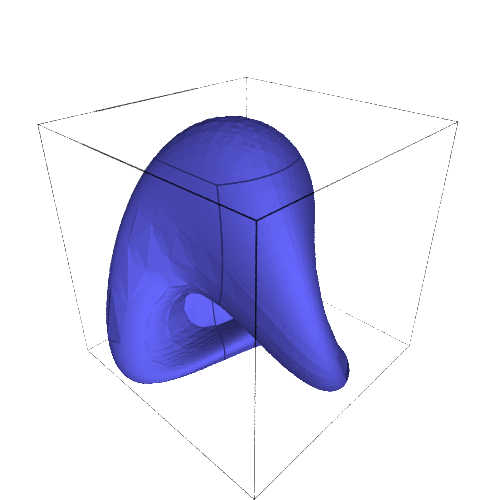

In [37]:
g1 = parametric_plot3d(Psi.expr(X1,Y), (x1,-10,10), (y1,-10,10), plot_points=[100,100])
g2 = parametric_plot3d(Psi.expr(X2,Y), (x2,-10,10), (y2,-10,10), plot_points=[100,100])
g3 = parametric_plot3d(Psi.expr(X3,Y), (x3,-10,10), (y3,-10,10), plot_points=[100,100])
show(g1+g2+g3, viewer=viewer3D)

In [38]:
gX1 = X1.plot(Y, mapping=Psi, nb_values=40, plot_points=100)
gX2 = X2.plot(Y, mapping=Psi, nb_values=40, plot_points=100, color='green')
gX3 = X3.plot(Y, mapping=Psi, nb_values=40, plot_points=100, color='blue')

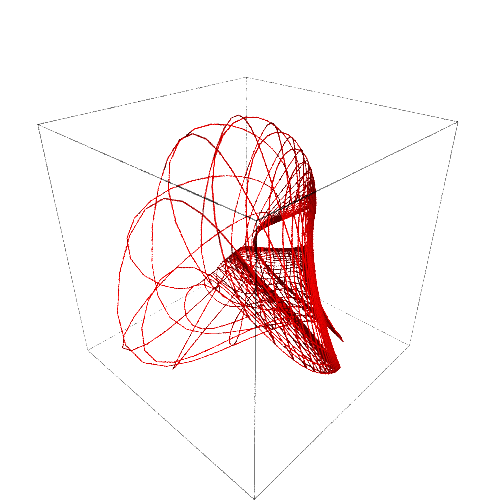

In [39]:
show(gX1, viewer=viewer3D)

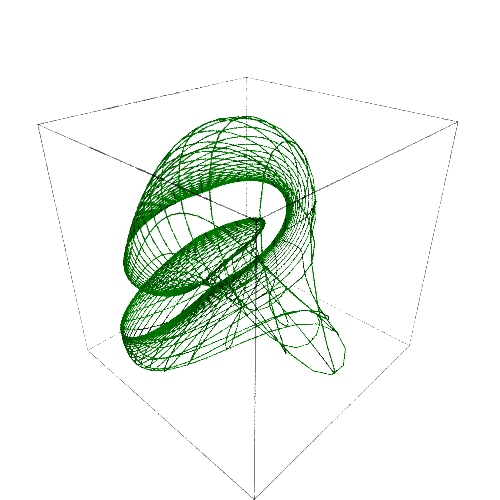

In [40]:
show(gX2, viewer=viewer3D)

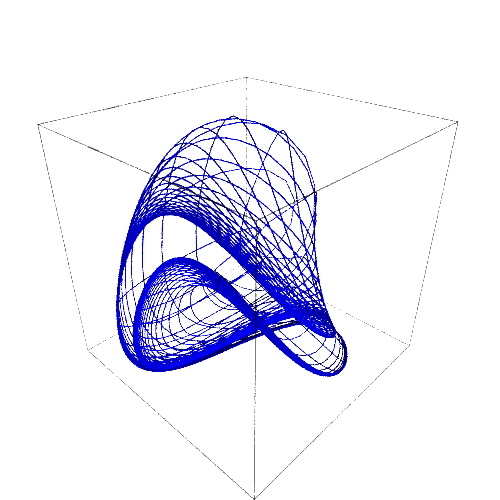

In [41]:
show(gX3, viewer=viewer3D)

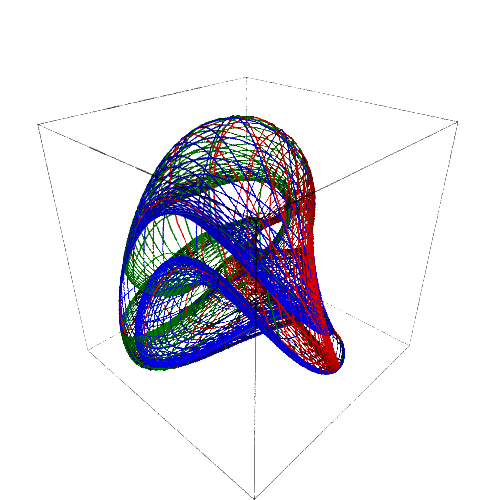

In [42]:
show(gX1+gX2+gX3, viewer=viewer3D)